# Series de Tiempo -- R -- Probabilidad
Notas de clase sobre pronóstico de series de tiempo usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre la extracción, transformación, visualización y carga de datos usando **R** en el contexto de la ciencia de los datos. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido

> 
* [Probabilidad como frecuencia](#Probabilidad-como-frecuencia)
* [Definiciones básicas](#Definiciones-básicas)
* [Representación de la probabilidad para variables continuas](#Representación-de-la-probabilidad-para-variables-continuas)
* [Momentos de una distribución](#Momentos-de-una-distribución)
* [Principales distribuciones continuas](#Principales-distribuciones-continuas)
* [Propiedades útiles de la distribución normal](#Propiedades-útiles-de-la-distribución-normal)
* [Muestreo de una distribución de probabilidades](#Muestreo-de-una-distribución-de-probabilidades)
* [Inferencia de la distribución de probabilidades](#Inferencia-de-la-distribución-de-probabilidades)
* [Análisis de la distribución de una muestra de datos](#Análisis-de-la-distribución-de-una-muestra-de-datos)
* [Pruebas de normalidad](#Pruebas-de-normalidad)
* [Teorema del Límite Central](#Teorema-del-Límite-Central)
* [Bootstrap](#Bootstrap)


**Bibliografía**.

>

---

# Probabilidad como frecuencia

[Contenido](#Contenido)

En su forma más simple, el concepto de probabilidad puede interpretarse como la frecuencia con que ocurre un evento. Ejemplo: Tirada de dos dados:

![alt text](images/tirada-dados.jpg)

    Prob(𝑋= 2) = 1 / 36 
    Prob(𝑋= 3) = 2 / 36  
    Prob(𝑋= 4) = 3 / 36
    Prob(𝑋= 5) = 4 / 36 
    Prob(𝑋= 6) = 5 / 36 
    Prob(𝑋= 7) = 6 / 36
    Prob(𝑋= 8) = 5 / 36 
    Prob(𝑋= 9) = 4 / 36 
    Prob(𝑋=10) = 3 / 36
    Prob(𝑋=11) = 2 / 36 
    Prob(𝑋=12) = 1 / 36 


---

**Ejercicio.--** Los soldados mediavales apostaban con dos dados de la siguiente manera: si el resultado es par {2, 4, 6, 8, 10, 12} ganaba el soldado A; y si el resultado es impar {3, 5, 7, 9, 11} ganaba el soldado B. ¿Quién tiene mayor probabilidad de ganar?

---

# Definiciones básicas

[Contenido](#Contenido)

* Todas las probabilidades deben estar entre 0 y 1: 
$$0 <= \text{Prob}(x_i) <= 1$$

* Las probabilidades de eventos mutuamente exclusivos y colectivamente exhaustivos deben sumar la unidad:

$$\sum_{i=1}^n \text{Prob}(x_i) = 1$$

<img src="images/eventos-conjuntos-2.jpg" width=500>

* Probabilidad conjunta: Los eventos ocurren simultaneamente. 

$$\text{Prob}(F1~\text{and}~V2)$$

<img src="images/probabilidad-conjunta-3.jpg" width=250>

* Probabilidad condicional: probabilidad de que ocurra un evento sabiendo que el otro ya ocurrio.

$$\text{Prob}(V2 ~ | ~F1) = \text{Prob}(F1~\text{and} ~ V2) ~/~\text{Prob}(F1)$$

<img src="images/probabilidad-condicional.jpg" width=150>

* Independencia: Si los eventos $A$ y $B$ son independientes:

$$\text{Prob}(A~|~B) = \text{Prob}(A)$$

De la definición de probabilidad condicional:

$$\text{Prob}(A~|~B) = \text{Prob}(A) = \frac{\text{Prob}(A~\text{and}~B)}{\text{Prob}(B)}$$

Entonces:

$$\text{Prob}(A~\text{and}~B)~=~\text{Prob}(A)~*~\text{Prob}(B)$$  

* Probabilidad marginal: Sea $𝑋_i$ con $𝑖 = 1, ... , 𝑛$, un conjunto de eventos mutuamente exclusivos y colectivamente exhaustivos. La probabilidad de un evento $𝐴$ es:

$$\text{Prob}(A) = \sum_{i=1}^n \text{Prob}(A~\text{and}~X_i)$$

<img src="images/eventos-conjuntos.jpg" width=750>

* Para dos eventos $A$ y $B$:

$$\text{Prob}(A ~\text{or}~B) = \text{Prob}(A) + \text{Prob}(B) - \text{Prob}(A~\text{and}~B)$$

<img src="images/probabilidad-conjunta-3.jpg" width=250>

* Complemento: 
$$\text{Prob}(\text{not}~ A) = 1 - \text{Prob}(A)$$

* Probabilidad total: 
$$\text{Prob}(A) = \text{Prob}(A~\text{and}~B) + \text{Prob}(A~\text{and}~\text{not}~B) = 
\text{Prob}(A~|~B)~\text{Prob}(B) ~+~ \text{Prob}(A~|~\text{not}~B)~\text{Prob}(\text{not}~B)$$

* Teorema de Bayes:
$$\text{Prob}(A~\text{and}~B) = \text{Prob}(A~|~B)~\text{Prob}{B} =  \text{Prob}(B~|~A)~\text{Prob}{A}$$

$$\text{Prob}(B~|~A) = \frac{\text{Prob}(A~|~B)~\text{Prob}{B}}{\text{Prob}(A)}$$

$$ = \frac{\text{Prob}(A~|~B)~\text{Prob}{B}} {\text{Prob}(A~|~B)~\text{Prob}(B) ~+~ \text{Prob}(A~|~\text{not}~B)~\text{Prob}(\text{not}~B)}$$

---


**Ejercicio.--** Complete las siguientes tablas de probabilidades:



*Probabilidades totales*:

*Probabilidades condicionales*:

---


# Representación de la probabilidad para variables continuas

[Contenido](#Contenido)

Se usa una función matemática para definir la función de densidad de probabilidad. Se nota como $f_X(x)$.

<img src="images/prob-continua.jpg" width=350>

La función de densidad de probabilidad acumulada es la integral de $f_X(x)$ entre $-\infty$ y $x$ y se define como:

$$F_X(x)= \int_{-\infty}^x f_X(u) du$$

# Momentos de una distribución

[Contenido](#Contenido)

Los momentos de una distribución permiten caracterizar sus propiedades. Estos son:

**Media o valor esperado**:  $ E[x_t ]= μ_x =$ $ \int f_x (u)\,du =M_1$

**Varianza**:  $V[x_t ] = σ_x^2 = E[(x_t-μ_x )^2 ]=M_2-M_1^2$

**Asimetría**:  $S_x = E[(x_t-μ_x )^3 ]=M_3-3M_2 M_1+2M_1^2$

**Curtosis**: $K_x = E[(x_t-μ_x )^4 ]=M_4-4M_3 M_1+6M_2 M_1^2-3M_1^4$

Interpretación momentos centrales de una distribución:

<img src="images/fdp.png" width=500>

# Principales distribuciones continuas

[Contenido](#Contenido)

* Distribución normal:

$$f_X(x|\mu_X, \sigma_X) = \frac{1}{\sigma_X \sqrt{2\pi}} \exp\Big[ {-\frac{1}{2}\Big( \frac{x-\mu_X}{\sigma_X}   \Big)^2} \Big]$$

* Distribución normal estandarizada: es la distribución normal con $\mu_X=0$ y $\sigma_X=1$.

* Distribución lognormal: La variable $y = \log(x)$ sigue una distribución normal.

---

**Ejercicio.--** El lenguaje R tiene las siguientes funciones para la distribución normal:

     dnorm(x, mean = 0, sd = 1, log = FALSE)
     pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
     qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
     
donde: 
* `dnorm(x)` es la función de densidad de probabilidad $f_X(x)$. 
* `pnorm(q)` es la función de densidad de probabilidad acumulada $F_X(q)$. 
* `qnorm(p)` es la inversa de $F_X(q)$. 

En una misma figura, grafique la función de densidad de probabilidad para las siguientes distribuciones:
* `mean = 0` y `sd = 0.2`.
* `mean = 0` y `sd = 1.0`.
* `mean = -2` y `sd = 0.5`.

**Ejercicio.--** Cuál es el valor de $x$ para una distribución normal estándar tal que el área entre $-\infty$ y $x$ sea:

* 0.01
* 0.05
* 0.10

**Ejercicio.--** Cuál es el valor de $x$ para una distribución normal estándar tal que el área entre $-x$ y $x$ sea:

* 0.90
* 0.95
* 0.99

**Ejercicio.--** El lenguaje R tiene las siguientes funciones para la distribución lognormal:

     dlnorm(x, meanlog = 0, sdlog = 1, log = FALSE)
     plnorm(q, meanlog = 0, sdlog = 1, lower.tail = TRUE, log.p = FALSE)
     qlnorm(p, meanlog = 0, sdlog = 1, lower.tail = TRUE, log.p = FALSE)
     
donde: 
* `dlnorm(x)` es la función de densidad de probabilidad $f_X(x)$. 
* `plnorm(q)` es la función de densidad de probabilidad acumulada $F_X(q)$. 
* `qlnorm(p)` es la inversa de $F_X(q)$. 

En una misma figura, grafique la función de densidad de probabilidad para las siguientes distribuciones:
* `meanlog = 0` y `sdlog = 0.25`.
* `meanlog = 0` y `sdlog = 0.50`.
* `meanlog = 0` y `sdlog = 1.00`.

**Ejercicio.--** Cuál es el valor de $x$ para una distribución lognormal (estándar) tal que el área entre $-\infty$ y $x$ sea:

* 0.01
* 0.05
* 0.10

**Ejercicio.--** Cuál es el valor de $x$ para una distribución lognormal (estándar) tal que el área entre $-x$ y $x$ sea:

* 0.90
* 0.95
* 0.99

**Ejercicio.--** Para muestras pequeñas, se suele utilizar la distribución t en vez de la normal. Las funciones en el lenguaje R para esta distribución son las siguientes:

    dt(x, df, ncp, log = FALSE)
    pt(q, df, ncp, lower.tail = TRUE, log.p = FALSE)
    qt(p, df, ncp, lower.tail = TRUE, log.p = FALSE)
    
  donde: 
* `dt(x, df)` es la función de densidad de probabilidad $f_X(x)$. 
* `pt(q, df)` es la función de densidad de probabilidad acumulada $F_X(q)$. 
* `qt(p, df)` es la inversa de $F_X(q)$. 

El parámetro `df` corresponde a los grados de libertad

En una misma figura, grafique la función de densidad de probabilidad para las siguientes distribuciones:
* `df = 10`.
* `df = 20`.
* `df = 30`.

Adicionalmente,  grafique en la misma figura la distribución normal equivalente.

**Ejercicio.--** Cuál es el valor de $x$ para una distribución t con 20 grados de libertad tal que el área entre $-\infty$ y $x$ sea:

* 0.01
* 0.05
* 0.10

**Ejercicio.--** Cuál es el valor de $x$ para una distribución t con 20 grados de libertad tal que el área entre $-x$ y $x$ sea:

* 0.90
* 0.95
* 0.99

---

# Propiedades útiles de la distribución normal

[Contenido](#Contenido)

* Sean $x \sim N(\mu_X, \sigma_X^2)$ y $y \sim N(\mu_Y, \sigma_Y^2)$, entonces:

$$ x + y \sim N(~\mu_X~+~\mu_Y, ~\sigma_X^2 + \sigma_Y^2~)$$

* Sea $x \sim N(\mu_X, \sigma_X^2)$ y dos números reales $a$ y $b$, entonces:

$$a~+~b~\sim N(a\mu_X+b,~ a^2 \sigma_X^2)$$

* Sean $x \sim N(\mu_X, \sigma_X^2)$ y $\epsilon \sim N(0, 1)$, entonces:

$$x = \mu_X~+~\sigma_X \epsilon$$

# Muestreo de una distribución de probabilidades

[Contenido](#Contenido)

La muestra ${x_1, x_2, ..., x_n}$ se define como una muestra aleatoria de una distribución de probabilidades, si los valores $x_i$:

* Tienen la misma distribución de probabilidades.
* Son independientes.

Estas propiedades se suelen abreviar como iid (independientes e identicamente distribuidas).

In [1]:
## aleatorio uniforme entre 0 y 1
runif(5)

[1] 0.09831047 0.44695203 0.43563919 0.09662550 0.82843152

In [2]:
## aleatorio normal estándar
rnorm(5)

[1] -1.20115444 -1.15221214  0.30045302 -0.06418787  0.99245621

In [3]:
## aleatorio distribución t con 10 grados de libertad
rt(5, 10)

[1] -0.5119015 -1.2435631 -0.7645445  1.5938040 -1.5000938

In [4]:
## aleatorio distribución lognormal
rlnorm(5)

[1] 0.3301649 0.8023612 2.1279440 0.3559338 1.3879519

# Inferencia de la distribución de probabilidades

[Contenido](#Contenido)

En la parte de probabilidades se consideran dos problemas complementarios:

* La generación de una muestra de números aleatorios a partir de una distribución teórica.
* La inferencia de la distribución a partir de una muestra de datos aleatorios 

<img src="images/dist-inferencia.jpg" width=600>

# Análisis de la distribución de una muestra de datos

[Contenido](#Contenido)

Sea una muestra de datos obtenida de una distribución normal estándar

In [5]:
x <- rnorm(200)

In [6]:
## cálculo de la media de la muestra de datos
mean(x)

[1] -0.1785597

In [7]:
## desviación estándar
sd(x)

[1] 1.071519

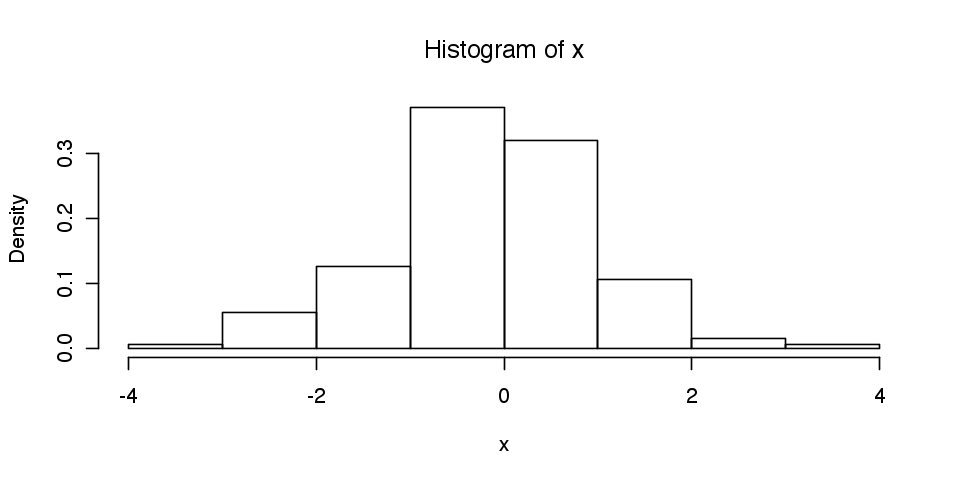

In [8]:
## histograma
options(repr.plot.width=8, repr.plot.height=4)

hist(x,
     freq = FALSE) # grafica densidad de probabilidad

**Aproximación empírica de la función de densidad de probabilidad**. A cada punto de la muestra de datos se le asigna una función unitaria de densidad de probabilidad.

<img src="images/fda.png" width=600>

Con:
 
* $N$: Número de puntos
* $K$: Kernel
* $h$: Ancho del kernel

Esto se conoce como una estimación no paramétrica de una función de densidad, y se utiliza para con el fin de estimar una función de densidad que no siga una distribución conocida, como la normal, exponencial, log-normal, entre otras. Normalmente se utiliza $h=1$.

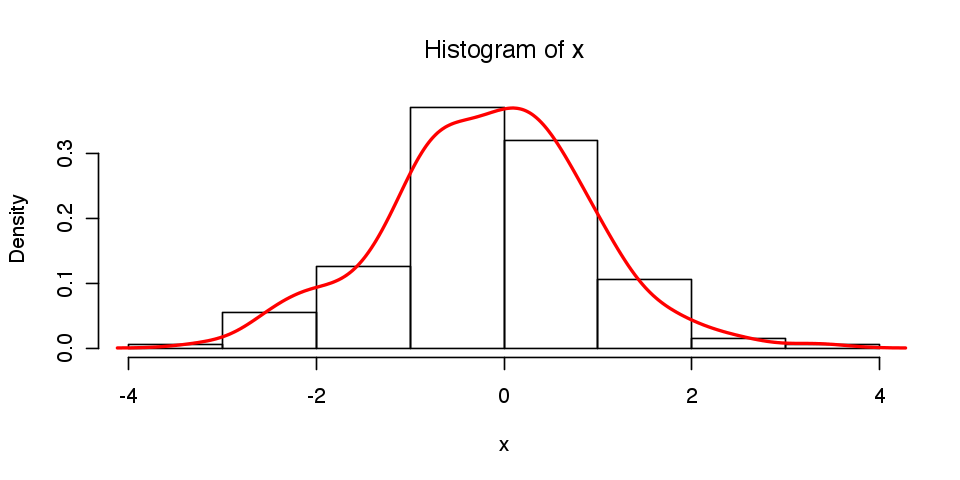

In [9]:
## Para generar una gráfica de densidad.

hist(x,
     freq = FALSE)             # grafica densidad de probabilidad

d <- density(x)
lines(d, col = 'red', lwd = 2) # aproximación empírica a la función de densidad de probabilidad  

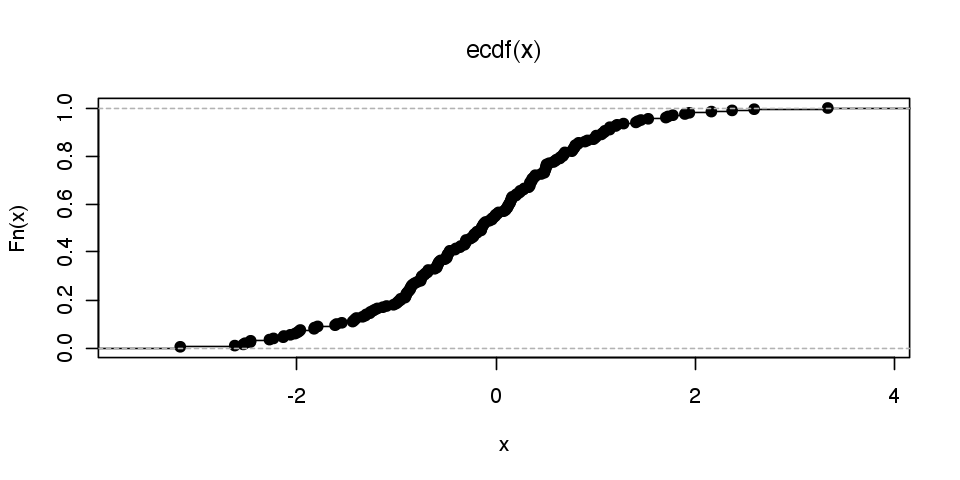

In [10]:
## función empírica de densidad acumulada
plot(ecdf(x)) 

---

**Ejercicio.--** Realice la misma gráfica anterior y adicione la función de densidad acumulada de una distribución estándar.

**Ejercicio.--** Una distribución Chi-cuadrada de $n$ grados de libertad se define como la variable aleatoria:

$$ z_1^2+...+z_n^2 = x_n^2$$

donde $z_i$ son números aleatorios provenientes de una distribución normal estándar. Realice las siguientes actividades:

* Genere 400 números aleatorios $x_i$ con $n = 5$ a partir de la definición anterior.
* En la misma figura grafique: (a) el histograma; (b) la distribución empírica; (c) la función de densidad de probabilidad para la distribución teórica chi-cuadrado con 5 grados de libertad.

---

# Pruebas de normalidad

[Contenido](#Contenido)

Un problema típico de series de tiempo consiste en determinar si una muestra de datos proviene de una distribución normal. Para ello, se consideran las siguientes hipótesis:

* $H_0:$ Las observaciones ${x_1,…,x_T}$ provienen de una distribución normal con media y varianza desconocidas
* $H_a:$ Las observaciones provienen de una distribución arbitraria

Metodologías típicas:
* Gráfico Cuartil – Cuartil (Q-Q plot)
* Gráfico de probabilidad normal
* Prueba de Jarque-Bera


** Gráfica Cuartil-Cuartil (Q-Q plot)** 

Método gráfico para comparar dos distribuciones.  Si los datos provienen de la misma distribución, forman una línea recta. 


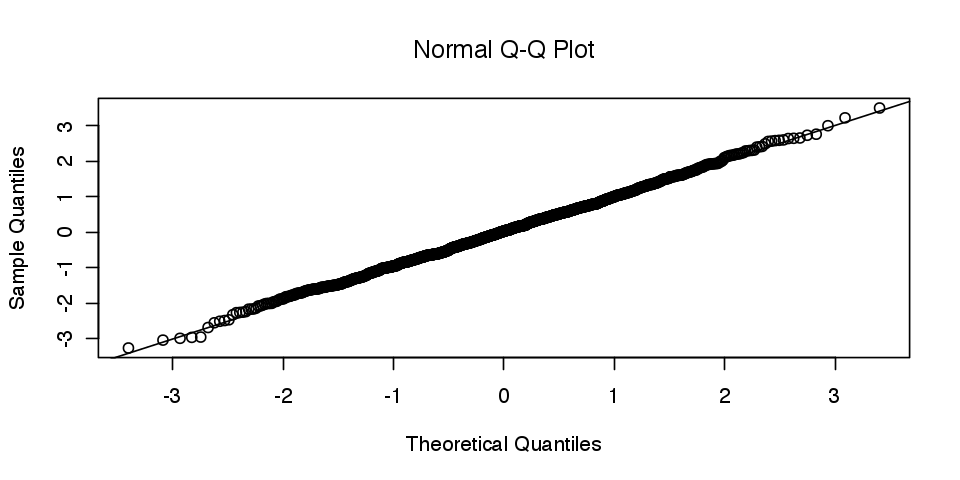

In [11]:
options(repr.plot.width=8, repr.plot.height=4)

x <- rnorm(1500, 0,1)
qqnorm(x)
abline(0,1)

**Prueba de normalidad de Jarque-Bera** 

Se basa en determinar si los datos tienen la misma asimetría $(M_3)$ y curtosis $(M_4)$ de una distribución normal.

* $H_0:$ Los datos provienen de una distribución normal
* $H_a:$ Los datos no provienen de una distribución normal 

Esta prueba puede ser engañosa para muestras pequeñas. El rechazo de $H_0$ puede indicar:
* La presencia de observaciones atípicas
* Que la varianza no es constante
* La presencia de comportamiento no lineal (dependencia temporal)


In [12]:
## Prueba de normalidad Jarque-Bera
library(moments)   # Instale primero la paquete
jarque.test(x)


	Jarque-Bera Normality Test

data:  x
JB = 1.2313, p-value = 0.5403
alternative hypothesis: greater


**Otras pruebas de normalidad en R** 


In [13]:
## Test de Shapiro-Wilks para probar normalidad
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.99907, p-value = 0.6638


In [14]:
## Test Anderson-Darling para probar normalidad
library(nortest)   # Instale el paquete primero
ad.test(x)


	Anderson-Darling normality test

data:  x
A = 0.31253, p-value = 0.5491


----

**Ejercicio.--** Genere una muestra aleatoria de 1000 datos de la variable $z$, la cual está definida como $z = x + y$ donde $x$ sigue una distribución normal estándar, y $y$ sigue una distribución normal con media = 1 y varianza igual a 0.5. Grafique las distribuciones teórica  y empírica de $y$.

---

# Teorema del Límite Central 

[Contenido](#Contenido)

Sea ${x_i}$ para ${i=1,…,n}$ una muestra aleatoria $i.i.d.$ con media $μ$ y varianza $σ^2$. Para $n→\infty$ la variable ${S_n=}$ $\frac{1}{n}$ $\sum_{i=1}^{n}x_{i} $, se aproxima a una distribución normal con media $μ$ y varianza $\frac{σ^2}{n}$





---

**Ejercicio.--** Genere varias muestras de 300 datos provenientes de una distribución uniforme, y para cada una de ellas calcule la media. Muestre graficamente que la distribución de las medias sigue una distribución normal (grafique la distribución empírica y teórica usando las técnicas ilustradas anteriormente). 

**Ejercicio.--** Juedo de dados 7-11 o dados callejeros.

* El jugador tira los dados por primera vez:
  * Si saca 7 o 11 gana la apuesta inmediatamente.
  * Si saca 2, 3 o 12 pierde la apuesta inmediatamente.
  * Si saca 4, 5, 6, 8, 9, 10 sigue tirando los dados.
* El jugador sigue tirando hasta que:
  * Saca 7 en cuyo caso pierde.
  * Saque la misma cantidad de la primera tirada, en cuyo caso gana.
  
En cada juego se apuesta 1 y se cuenta con un capital inicial de 20. El jugador se retira si alcanza un capital de 50.

Cuál es la probablidad de quiebra?

---

# Bootstrap

[Contenido](#Contenido)

El bootstrap es una técnica numérica para estimar la distribución de probabilidades de cualquier estadístico calculado sobre una muestra de datos y tiene muchas aplicaciones en modelado predictivo y pronóstico de series de tiempo.

Sea una secuencia $\{x_i; i = 1, ...,n\}$ proveniente de una distribución poblacional $F$ desconocida con media $\mu$ y varianza $\sigma^2$. Esto es:

$$ F \to (x_1, ...,x_n)$$

* $F$ es aproximada a través de la distribución empírica de los datos $G$.

* El parámetro $\theta$ es una función $𝑡(∙)$ de la distribución de probabilidades de la población $𝐹: 𝜃 = 𝑡(𝐹)$

* $\theta$ se aproxima a partir de la distribución empírica de probabilidad de los datos: $\theta = 𝑡(𝐹)$.

* Muestra bootstrap: Sea G la distribución empírica de los datos que coloca una probabilidad de $1/n$ en el dato $𝑥_i, ~𝑖=1,...,𝑛$.Una muestra bootstrap se define como una muestra aleatoria de tamaño $𝑛$ obtenida de $G$:

$$𝑥^∗ = ( 𝑥_1^∗, 𝑥_2^∗, ..., 𝑥_n^*)$$

por ejemplo, $𝑥_1^∗ = 𝑥_3, 𝑥_2^∗= 𝑥_1, 𝑥_3^∗ = 𝑥_3, ...$

**Algoritmo bootstrap no paramétrico**

* Se tiene la muestra $x=\{x_i; 1,...,n\}$

* Se seleccionan $B$ muestras bootstrap independientes $x^{*1}, ..., x^{*B}$ cada una de $n$ elementos obtenidos de la muestra original.

* Para cada muestra bootstap se calcula el estadístico de interes: $\theta(b) = t(x^{*b})$

* La muestra $\theta(1), ..., \theta(B)$ representa la distribución de probabilidades de $\theta$ y puede calcularsele valor esperado, desviación estándar, etc.

**Ejemplo**

In [15]:
## sea la muestra de datos para la cual se desea obtener 
## la distribución de probabilidades de la media
x <- c(1, 4, 5, 3, 8, 4, 3, 2, 1, 0, 2, 4, 7)

In [16]:
## por el teorema del límite central:
## la media de los datos sigue una distribución 
## normal con media m y varianza = s2 / n
n <- length(x)     # cantidad de datos
m <- mean(x)       # media muestral
s2 <- var(x) / n   # varianza muestral
cat(m, s2)

3.384615 0.4171598

In [17]:
## el mismo calculo usando bootstrap
B <- 200       # cantidad de replicas bootstrap
y = rep(0, B)  # muestra bootstrap

for(i in 1:B) {
    z <- sample(x,              # muestra original
                size = n,       # tamaño de la muestra bootstrap
                replace = TRUE) # se pueden repetir valores de la muestra original
    
    y[i] <- mean(z)             # replica bootstrap del estadístico
}

m_bootstrap   <- mean(y)        # valor esperado de la muestra bootstrap
s2_bootstrap  <- var(y)         # varianza de la muestra bootstrap

cat(m_bootstrap, s2_bootstrap)

3.392692 0.386215

---


**Ejercicio.--** El paquete `boot` que implementa la metodología de bootstraping. Uselo para repetir los cálculos anteriores. 

---

[Contenido](#Contenido)